# Chapter 5. Centrality Algorithims 


## Overview

* Used to understand the roles of a particular node in a graph and their impact on a network.
* Identify most important nodes and help us understand group dynamics such as:
1. Credibility
2. Accessibility
3. Speed of difusion (spread)
4. Bridges between groups

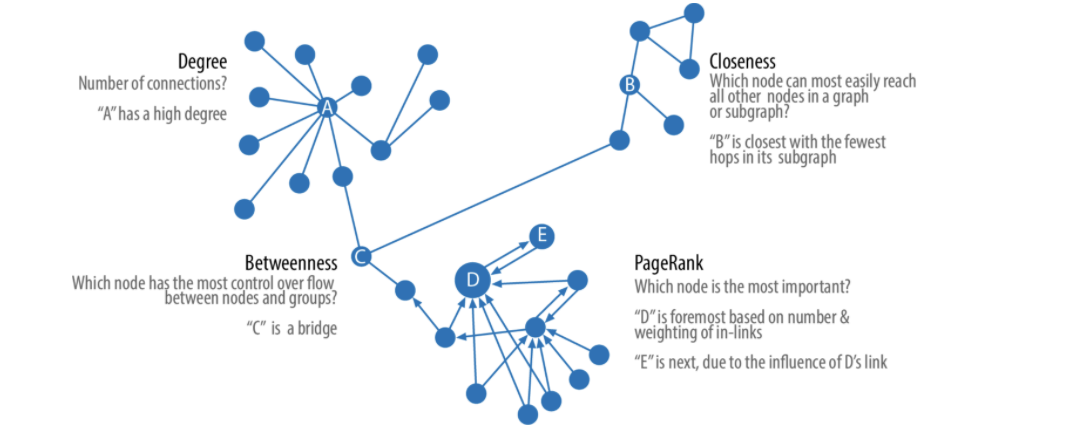


| Algo Type                                                        | What it does                                                                       | Example use                                                                                                            | Spark Example | Neo4j Example |
|------------------------------------------------------------------|------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|---------------|---------------|
| Degree Centrality                                                | Measures the number of relationships a node has                                    | Estimating a persons popularity by looking at their in-degrees and using their out degrees to estimate gregariousness  | Yes           | No            |
| Closeness Centrality Variation: Randomized Approximate  Brandes  | Meaures the number of shortest paths that pass through a node                      | Finding the optimal location of new public services  for maximum accessibility                                         | Yes           | Yes           |
| Betweeness Centrality Variation: Randomized Approximate  Brandes | Measures the number of shortest paths that pass through a node                     | Improving drug targeting by finding the control genes for specific diseases                                            | No            | Yes           |
| Page Rank                                                        | Estimates a current nodes importance from its linked neighbors and their neighbors | Finding the most influential features for extraction in machine learning and ranking text for entity relevance in NLP  | Yes           | Yes           |







## Degree Centrality 

* simplest algo in the book
* Understanding the reach of a node is a fair measure of importance
* How many other nodes can it touch? The degree of a node is the number of direct relationships it has


Example of Degree Centrality:

A person with a high degree of centrality may be more likely to catch a cold! 


#### average degree of a network

* simple the average connections (relationships) / total number of nodes. 

#### degree distribution 

* is the probability that a randomly selected node will have a certain number of relationships


#### both these measures: Degree Distribution and average degree of a network are used to categorize network types (small-world,scale free)

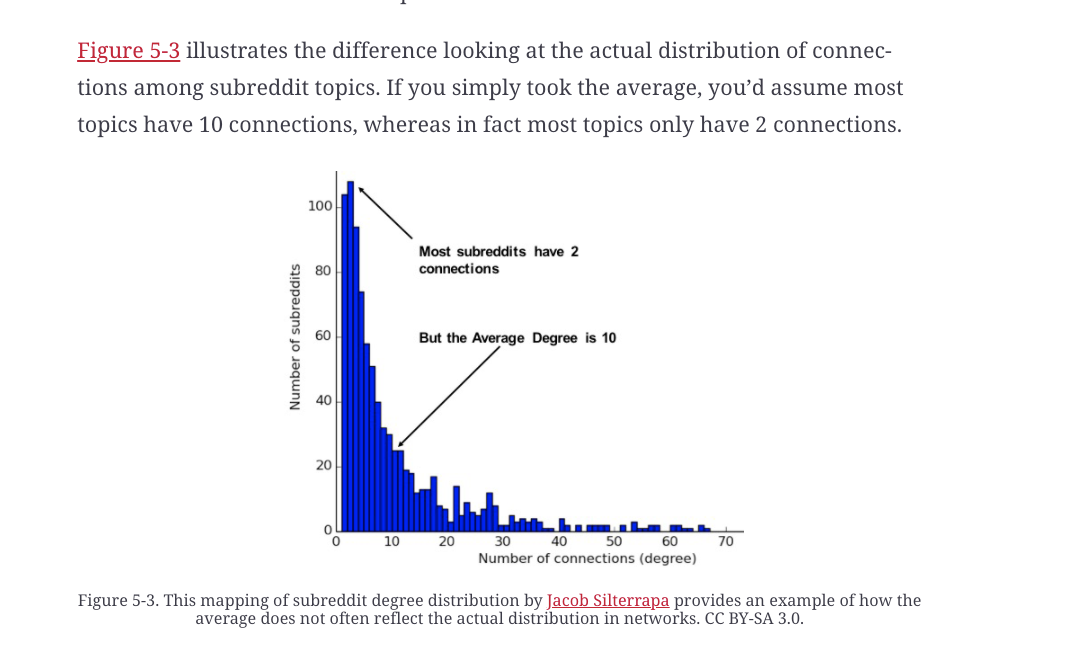

## When to use degree centrality? 

1. If you are trying to analyze influence by looking at number of incoming/outgoing relationships
2. If you are trying to find the popularity of a node

Degree centrality can be applied at a global scale - to find the minimum degree, maximum degree, mean degree and standard deviation across the entire graph



### Example degree centrality use cases

1. Identifying powerful individuals through their relationships.
2. Seperating fraudsters from legitimate users of an online auction site. The weighted centrality of fraudsters tends to be significantly higher due to collusion aimed at hiking prices. 


## Closeness Centrality 


*  A way of detecting nodes that are able to spread information efficiently through a subgraph
*  The measure of a nodes centrality is its average farness (inverse distance) to all other nodes.
*  Nodes with a high closeness score have the shortest distance from all other nodes. 
*  For each node, the Closeness Centrality Algorithim calculates the sum of its distances to all other nodes, based on calculating the shortest paths between all pairs of nodes.
* The resulting sum is then inverted to determine the closeness centrality score for that node. 

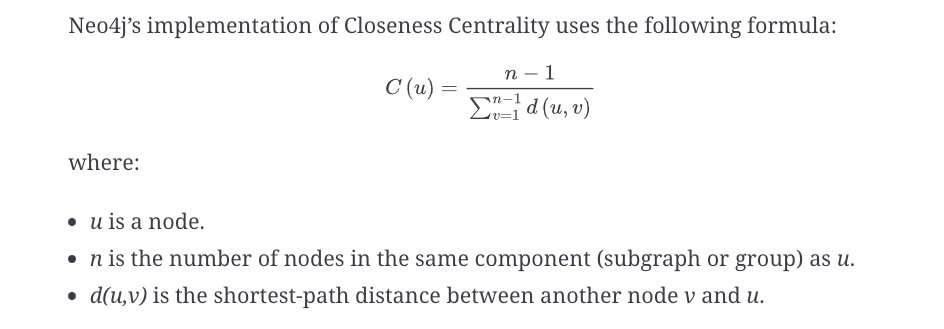

```
:param graph => 'closeness_centrality';

CALL gds.graph.create(
    (param)graph,
    
    'Person',
    'FOLLOWS'
)
YIELD
graphName, nodeProjection, nodeCount AS nodes, relationshipCount AS rels
RETURN graphName, nodeProjection.Book AS bookProjection, nodes, rels;


// It doesn't look like I can use gds.graph.create with this algo... 


CALL gds.alpha.closeness.stream({
    nodeProjection: 'Person',
    relationshipProjection: 'FOLLOWS'
}) 
YIELD nodeId, centrality
RETURN gds.util.asNode(nodeId).name as user, centrality 
ORDER BY centrality DESC 

```

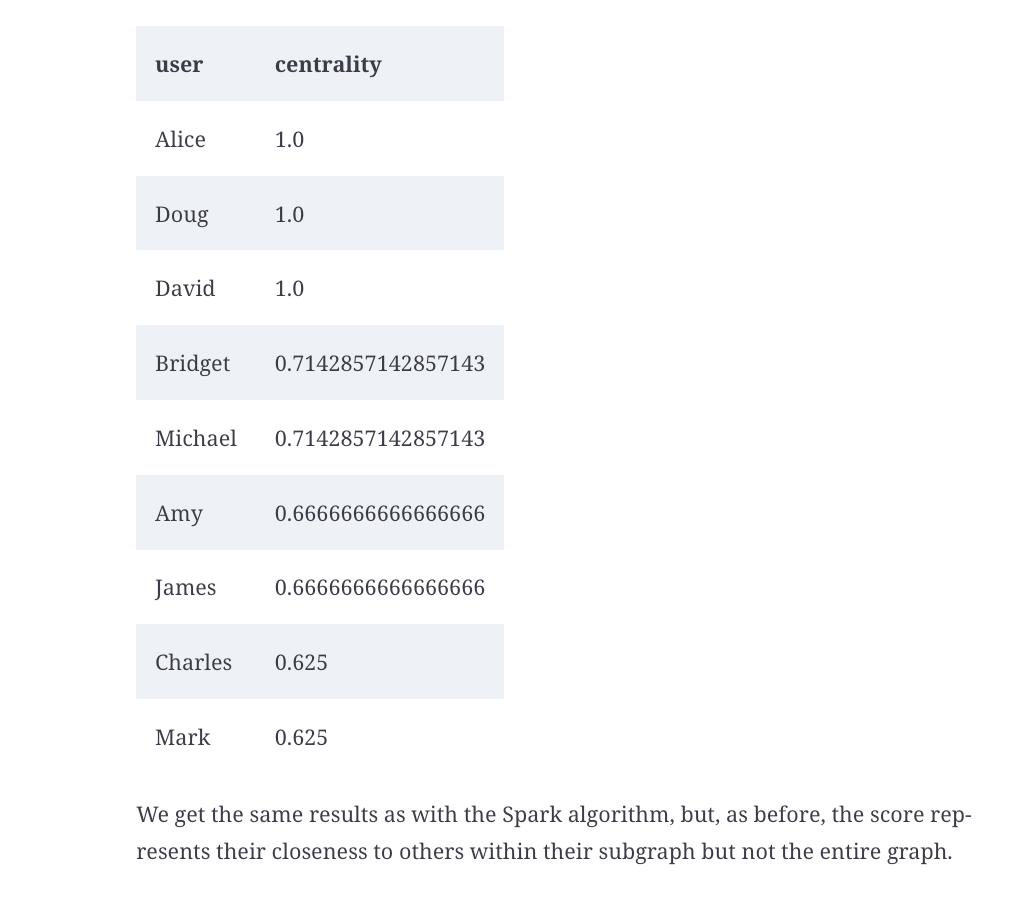



### Closeness Centrality Variation: Wasserman and Faust

* Stanley Wasserman and Katherine Faust came up with an improved formula for calculating closeness for graphs with many subgraphs
* Formula is the ratio of the fraction of nodes in a group that are reachable to the average distance from the reachable nodes


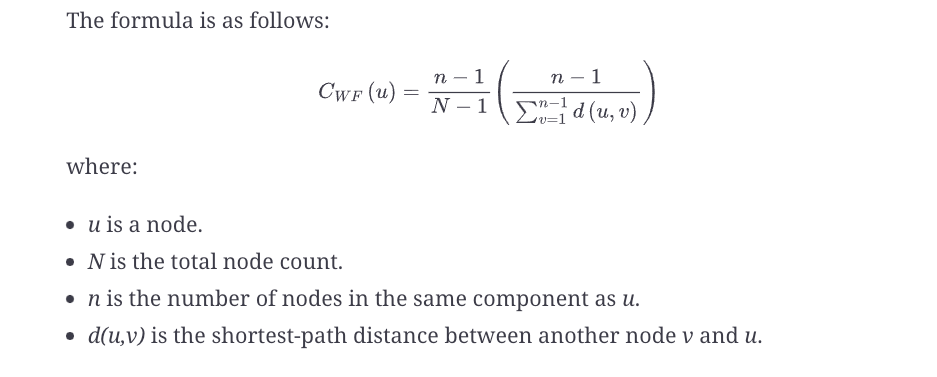


```
CALL gds.alpha.closeness.stream
({nodeProjection:'Person',relationshipProjection:'FOLLOWS',improved:true}) 
YIELD nodeId,centrality 
RETURN gds.util.asNode(nodeId).name, centrality ORDER BY centrality DESC
```


* Basically the nodes in the smaller subgraph ['Amy','James','David'] are all dampened. This is because this graph is not as important. So again this algo takes into consideration all subgraphs. 

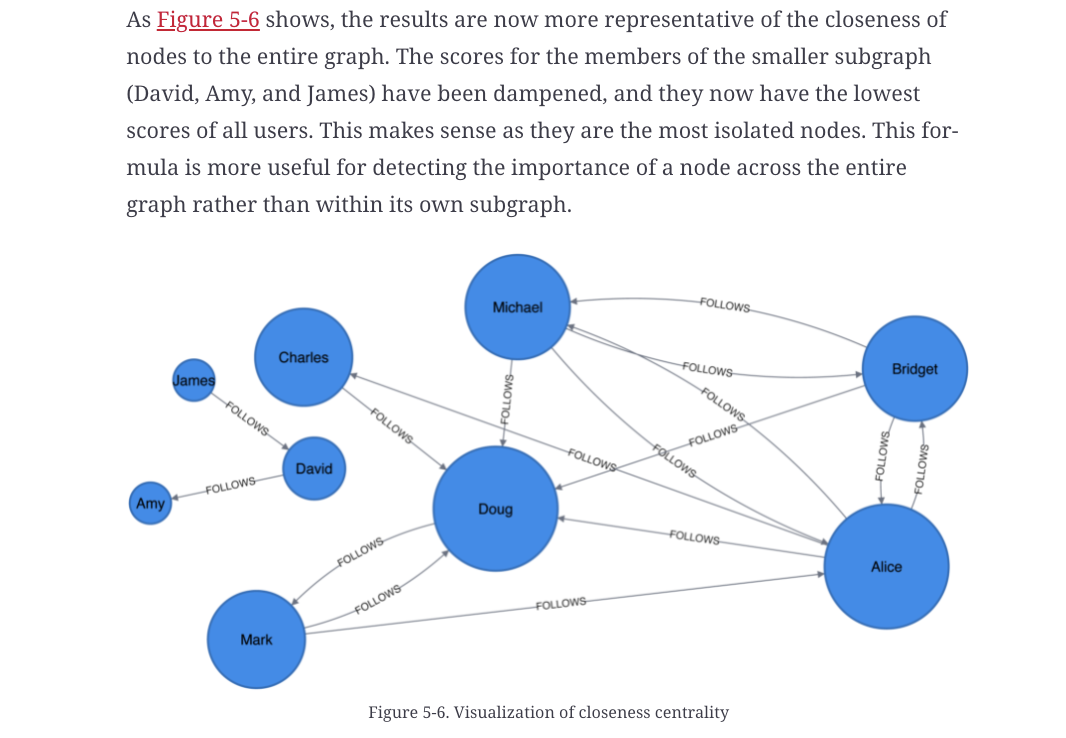



### Closeness Centrality Variation: Harmonic Centrality

* Harmonic centrality, valued centrality is a variant invented to solve the problem of unconnected graphs. 
* when calculating the closeness score for each node, rather than summing the distances of a node to all other nodes, it sums the inverse of those distances. This means that infinite values become irrelavant

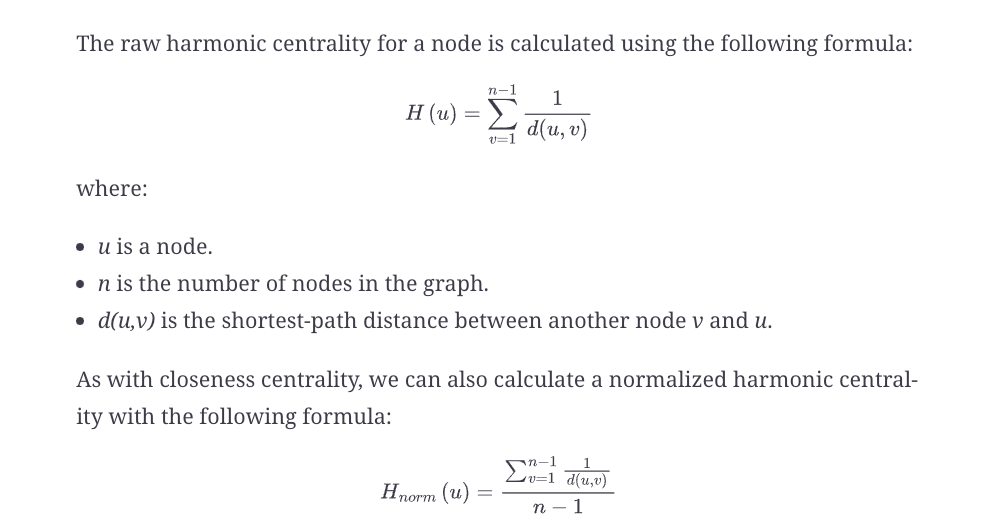


```

CALL gds.alpha.closeness.harmonic.stream({nodeProjection:'Person',relationshipProjection:'FOLLOWS'}) 
yield nodeId, centrality 
RETURN gds.util.asNode(nodeId).name, centrality ORDER BY centrality DESC
```

* pretty similar to the wasserman algo above. 
* Either algo can be used when working with graphs with more than one connected component



## Betweenness Centrality


* Sometimes the most important cog in the system is not the one with the most overt power or the highest status. Sometimes it's the middlemen that connect groups or the brokers who the most control over resources or the flow of information 


#### how it works

1. Calculates the shortest (weighted) path between every pair of nodes in a connected graph. 
2. Each node recieves a score, based on the number of these shortest paths that pass through the node.
3. The more shortest paths that a node lies on, the higher its score. 


### bridge and control points

* A bridge in a network can be a node or a relationship. 
* Easy way to look for them, find the node or relationship that if removed would tear off a part of the graph.
* We can also measure the betweeness of a cluster by treating the group as a node
* A node is considered pivotal for two other nodes if it lies on every shortest path between those nodes

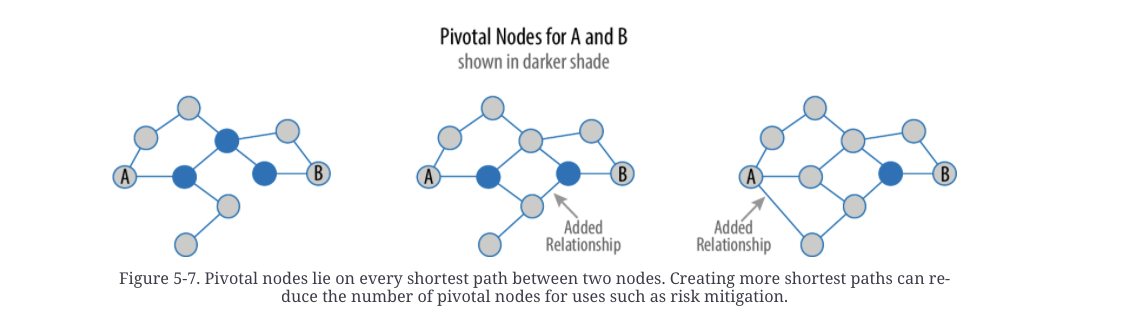



### Calculating betweenness centrality 

* The betweenness centrality of a node is calculated by adding the results of the folloing formula for all shortest paths


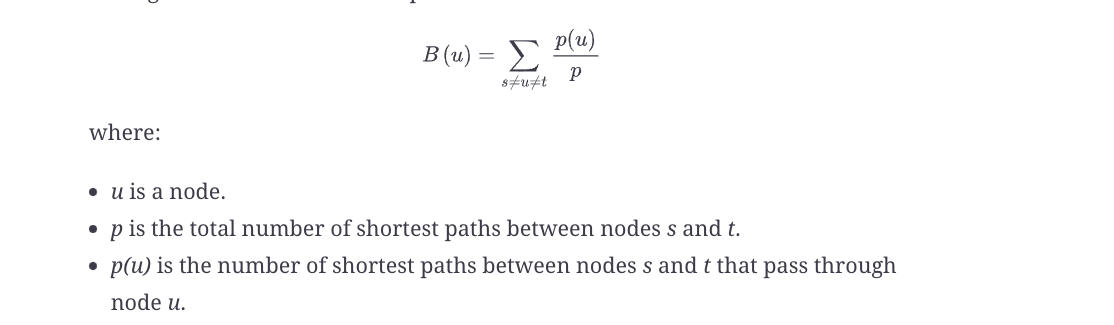

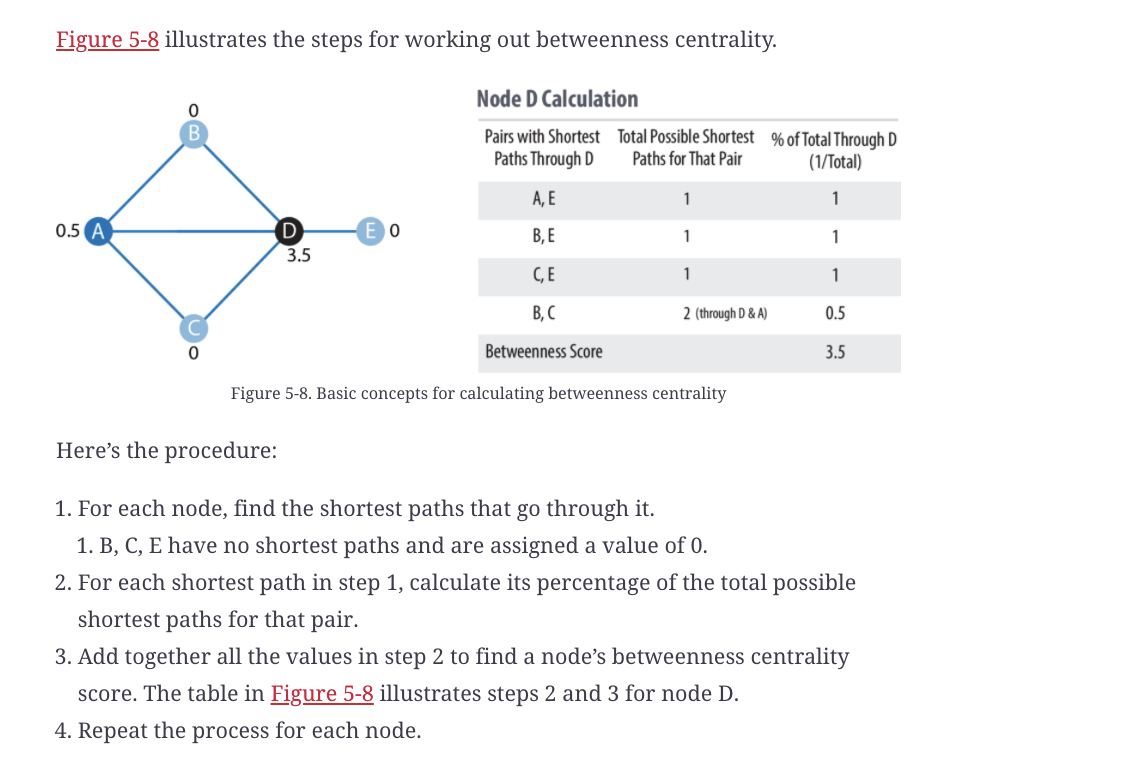





### When should I use betweeness centrality? 

* Betweenness centrality applies to a wide range of problems in real-world networks. We use it to find bottlenecks, control points and vulnerabilities. 

#### Example use cases include:

1. Identifying influencers in various organizations. Powerful individuals are not neccessiarily in management positions, but can be found in brokerage positions, using Between Centrality. Removal of such influencers can seriously destabalize an organization. This is a welcomed disruption if you are Law Enforcement, or a disaster if a business loses key staff it underestimated. 
2. Identifying key transfer points in networks such as electrical grids. Counterintuitively, removal of specific bridges can actually improve overall robustness by "islanding" disturbances. 
3. Helping microbloggers spread their reach on Twitter, with a recommendation engine for targeting influencers. 



```
CALL gds.betweenness.stream({nodeProjection:'Person',relationshipProjection:'FOLLOWS'}) 
YIELD nodeId,score 
RETURN gds.util.asNode(nodeId).name as user, score ORDER BY score DESC

```

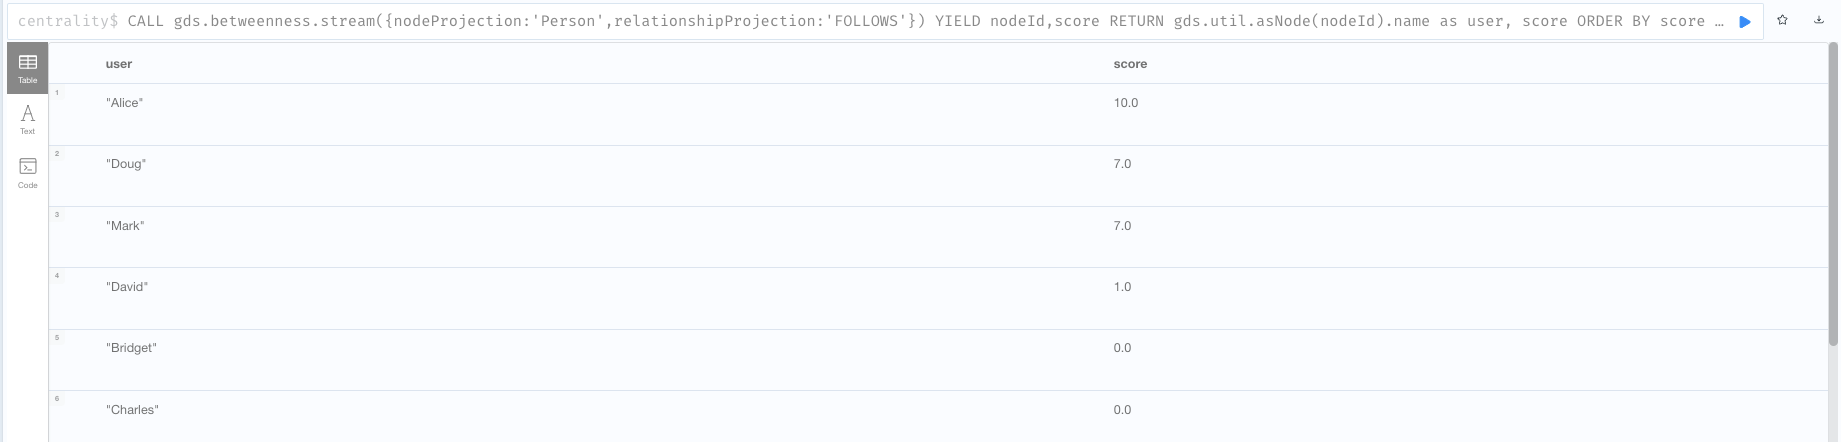
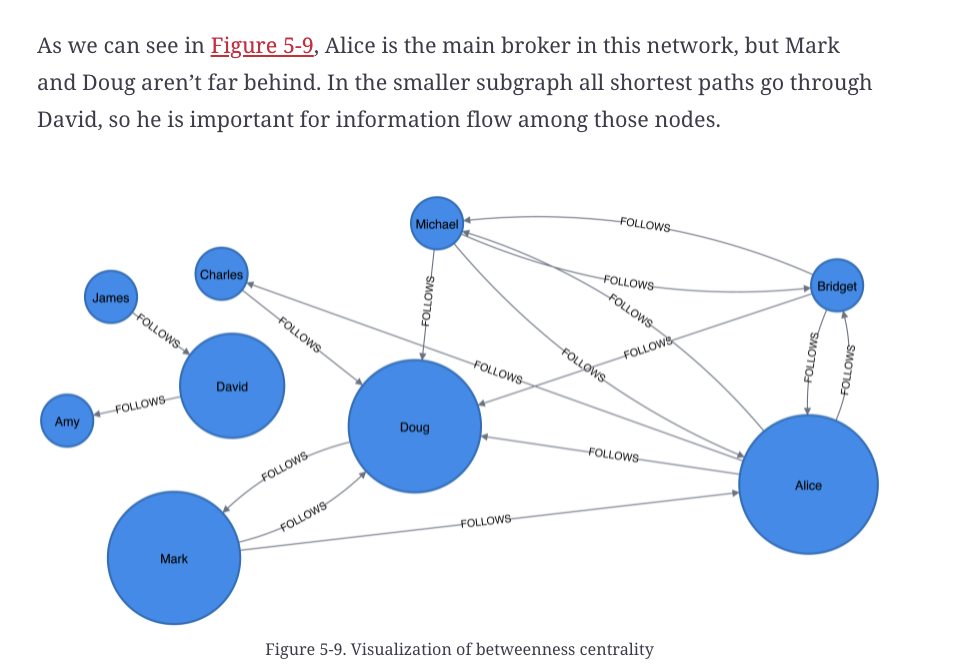



#### warning: for large graphs, exact centrality isn't practical.
* the fastest known algo for exactly computing betweeness of al the nodes has a runtime proportional to the product of the number of nodes and the number of relationships. We could filterdown to a subgraph first 



### Betweenness centrality variation: Randomized Apporximite Brandes

* Recall that calculating the exact betweenness of centrality on large graphs can be very expensive. We could therefore choose to use an approximation algo that runs faster but provides less precise results. 


#### Random

* Nodes are selected randomly
* those who have a degree lower than the mean 


#### Degree

* Nodes are selected randomly, but those whose degree is lower than the mean are automatically excluded
* As a further optimization, you could limit the depth used by the Shortest Path algo, which will then provide a subset of all shortest paths. 


## PageRank

* Best known centrality algorithim. 
* Measures the transative (directional) influence of nodes. All the other centrality algorithims we discuss measure the direct influence of a node
* Pagerank considers the influence of a nodes neighbors, and their neighbors. 
* An easy way to think of it is having powerful friends makes you powerful by proxy. 

calculated by either...

1. iteratively distributing one nodes rank over it's neighbors
2. randomly traversing the graph and counting the frequency with which each node is hit during these walks


#### PageRank measures the number and quality of incoming relationships to a node to determine an estimation of how important that node is. Basically Nodes with more sway over the network should have quality incoming relationships from other high value nodes in the network. 

* Measuring influence usually involves scoring nodes often with weighted relationships, then updating the scores over many iterations. Sometimes all nodes are scored, sometimes a random slection is used as a representative distribution. 

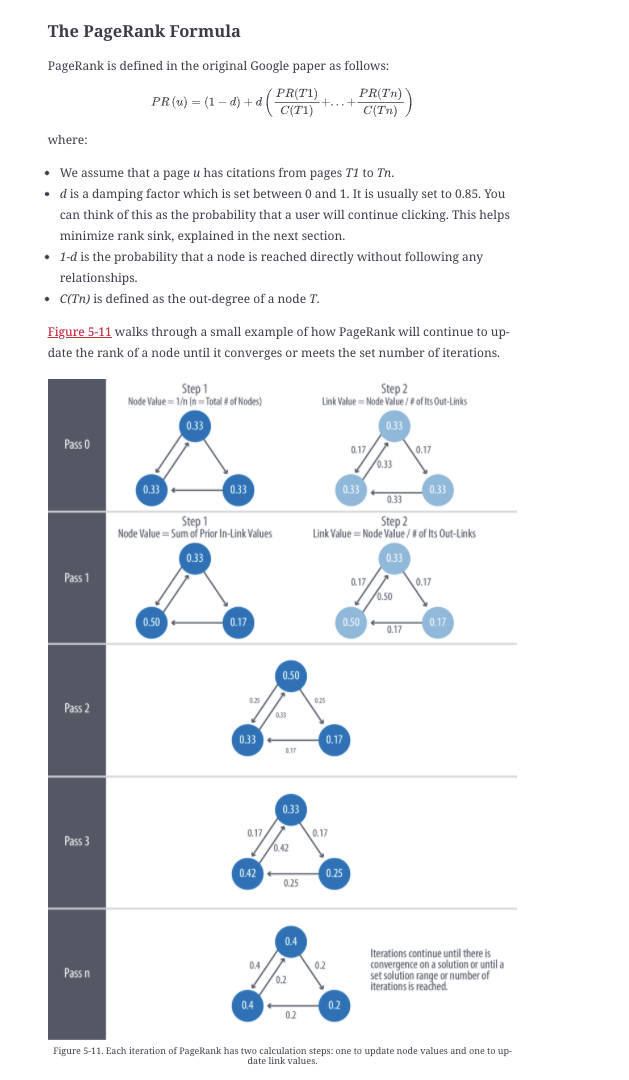




### Iterations, Random Surfers and Random Sinks

* PageRank is an iterative algorithim that runs either until scores converge or until a set number of iterations occur
* PageRank assumes there is a web surfer visiting pages by following links or by using a random URL. a damping factor _d_, defines the probability the next click will be through a link. Think of it as the probabilty the surfer gets bored and clicks on a new link.

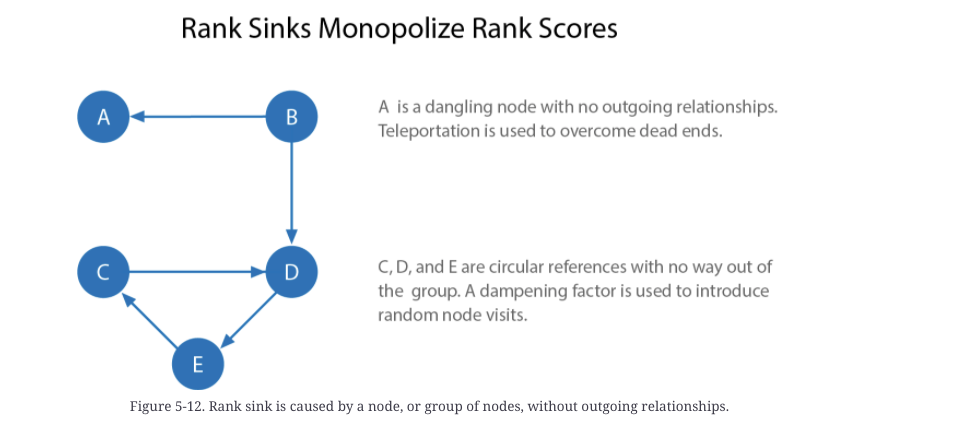


#### Strategies to avoid rank sinks? 

* Nodes that have no outgoing relationships could be assumed to have relationships to all other nodes. traversing these links is known as teleportation. 
* Damping helps provide another opportunity to avoid sinks by introducing a probability for direct link versus random node visitation. When you set d to .85 a compeltely random node is visited 15% of the time. 


### When to use PageRank?


* Many uses outside of web indexing. Use the algo whenever you're looking for broader influence over a network. For instance, if you're looking to target a gene that has the highest overall impact to a biological function, it may not be the most connected one. It may, in fact, be the gene with the most relationships to other, more signiicant functions. 


### Example use cases include:
1. Presenting users with recomendations of other accounts that they wish to follow
2. Predicting traffic flow and human movement in public spaces or streets. The algorithim is run over a graph of road intersections, where the PageRank score reflects the tendency of people to park or end their journey on each street
3. Page Rank can help reveal doctors or providers that are behaving in an unusual manner. 


```
CALL gds.pageRank.stream({
  nodeProjection: "User",
  relationshipProjection: "FOLLOWS",
  maxIterations: 20,
  dampingFactor: 0.85
})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).id AS page, score
ORDER BY score DESC;

```

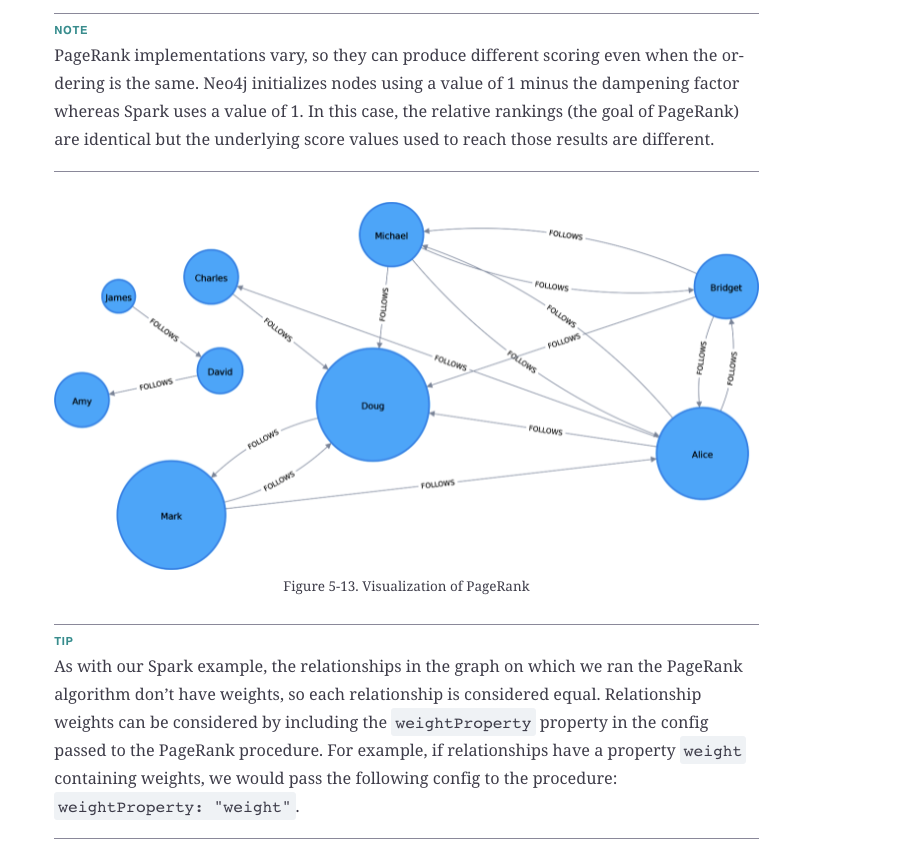